# UTBM AD50 TP

## Unsupervised Learning

*Adrien Bouyssou*

### 1. Imports

In [101]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as pyplot
import numpy

### 2. Preparations

#### 2.1 Data loading

In [110]:
cancer = load_breast_cancer()

columns = cancer.feature_names
target = cancer.target
data = cancer.data

#### 2.2 PCA

Here, I will setup PCA to make it printable on a 2D graph.

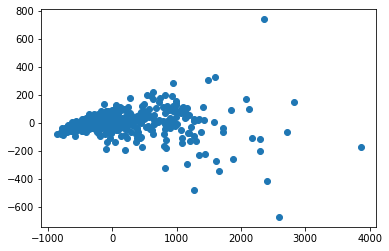

In [103]:
pca = PCA(2)
dataframe = pca.fit_transform(data)
 
pyplot.scatter(dataframe[:,0], dataframe[:,1])
pyplot.show()

#### 2.3 KMeans

Here, I will setup KMeans to make it setup 2 clusters: malign or benign

In [108]:
kmeans = KMeans(n_clusters=2)
predictions = kmeans.fit_predict(dataframe)

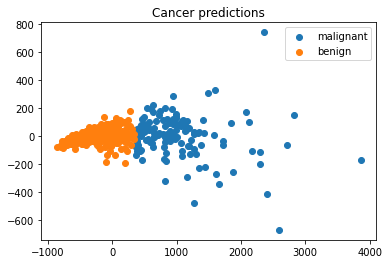

In [111]:
for index in numpy.unique(predictions):
    pyplot.scatter(dataframe[predictions == index , 0], dataframe[predictions == index , 1], label=cancer.target_names[index])
pyplot.legend()
pyplot.title('Cancer predictions')
pyplot.show()